#1. XGBoost(eXtra Gradient Boost)의 개요
> XGBoost는 트리 기반 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나이다. GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘이다.

##1.1 XGBoost의 주요장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제(Overfitting Regularization)
- 트리 가지치기(Tree pruning) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
- 자체 내장된 교차 검증
 - 반복 수행시마다 내부적으로 교차검증을 수행해 최적회된 반복 수행횟수를 가질 수 있음
 - 지정된 반복횟수가 아니라 교차검증을 통해 평가 데이트세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 기능이 있음
- 결손값 자체 처리

#2. XGBoost의 하이퍼 파라미터

##2.1 일반 파라미터
> 일반적으로 기본값을 사용한다.

- booster
 - gbtree(tree based model) 또는 gblinear(linear model) 중 선택
 - Default = 'gbtree'
- silent
 - Default = 1
 - 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
- nthread
 - CPU 실행 스레드 개수 조정
 - Default는 전체 다 사용하는 것
 - 멀티코어/스레드 CPU 시스템에서 일부CPU만 사용할 때 변경

##2.2 주요 부스터 파라미터
> 트리 최적화, 부스팅, Regularization 등과 관련된 파라미터


- learning rate(0.1)
 - GBM의 learning rate와 같은 파라미터
 - 범위: 0 ~ 1
- n_estimators(100)
 - 생성할 weak learner의 수
- min_child_weight(1)
 - GBM의 min_samples_leaf와 유사
 - 관측치에 대한 가중치 합의 최소를 말하지만 GBM에서는 관측치 수에 대한 최소를 의미
 - 과적합 조절 용도
 - 범위: 0 ~ ∞
- min_split_loss(0)
 - 리프노드의 추가분할을 결정할 최소손실 감소값
 - 해당값보다 손실이 크게 감소할 때 분리
 - 값이 클수록 과적합 감소효과
 - 범위: 0 ~ ∞
- max_depth(3)
 - 트리 기반 알고리즘의 max_depth와 동일
 - 0을 지정하면 깊이의 제한이 없음
 - 너무 크면 과적합(통상 3~10정도 적용)
 - 범위: 0 ~ ∞
- subsample(1)
 - GBM의 subsample과 동일
 - 데이터 샘플링 비율 지정(과적합 제어)
 - 일반적으로 0.5~1 사이의 값을 사용
 - 범위: 0 ~ 1
- colsample_bytree(1)
 - GBM의 max_features와 유사
 - 트리 생성에 필요한 피처의 샘플링에 사용
 - 피처가 많을 때 과적합 조절에 사용
 - 범위: 0 ~ 1
- reg_lambda(1)
 - L2 Regularization 적용 값
 - 피처 개수가 많을 때 적용을 검토
 - 클수록 과적합 감소 효과
- reg_alpha(0)
 - L1 Regularization 적용 값
 - 피처 개수가 많을 때 적용을 검토
 - 클수록 과적합 감소 효과
- scale_pos_weight(1)
 - 불균형 데이터셋의 균형을 유지

##2.3 학습 태스크 파라미터
> 학습 태스크 파라미터

###2.3.1 objective
 - reg:linear : 회귀
 - binary:logistic : 이진분류
 - multi:softmax : 다중분류, 클래스 반환
 - multi:softprob : 다중분류, 확률반환

###2.3.2 eval_metric
- 검증에 사용되는 함수정의
- 회귀 분석인 경우 rmse, MAE를, 클래스 분류 문제인 경우 logloss, error를 사용함.
- rmse : Root Mean Squared Error
 - 평균 제곱근 오차(Root Mean Square Error; RMSE)는 추정 값 또는 모델이 예측한 값과 실제 값의 편차에 대한 제곱을 평균하여 루트를 씌운 값
- mae : mean absolute error
 - 평균 절대값 오차는 예측한 값과 실제 값의 편차를 절대값으로 변환한 후 평균을 구한 값
- logloss : Negative log-likelihood
 - 각 예측 결과에 가중치를 두어 계산하는 것으로 분류 시 주로 사용됨.
- error : binary classification error rate
- merror : multiclass classification error rate
- mlogloss: Multiclass logloss
- auc: Area Under Curve

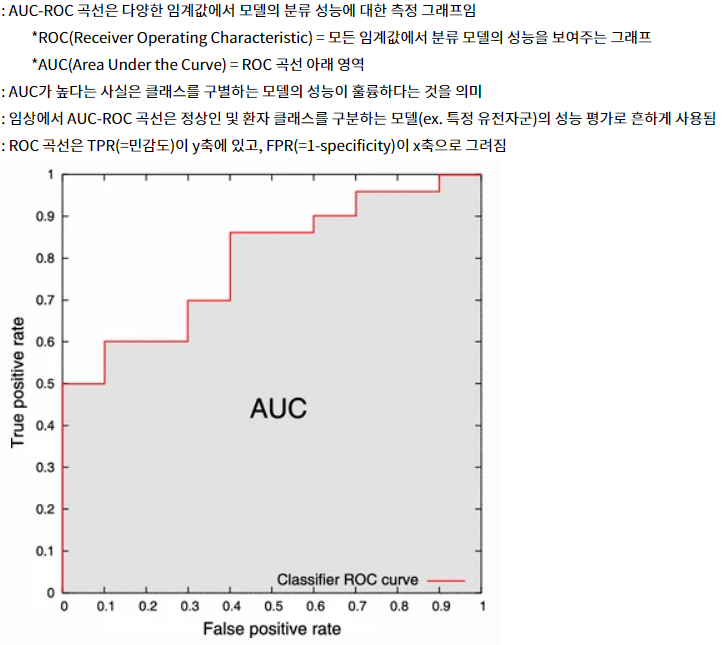

##2.4 과적합 제어
- eta 값을 낮춘다.(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator)를 반대로 높여주어야 한다.
- max_depth 값을 낮춘다.
- min_child_weight 값을 높인다.
- gamma 값을 높인다.
- subsample과 colsample_bytree를 낮춘다.

#3.Early Stopping 기능
> GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지

> n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가
50회를 반복하는 동안 학습오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료합니다.
(가령 100회에서 학습오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)